# Projeto COVID-19

In [1]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go

In [2]:
#Importando os dados
df = pd.read_csv("covid_19_data.csv", parse_dates=["ObservationDate", "Last Update"])
df

SNo ObservationDate Province/State  Country/Region  \
0          1      2020-01-22          Anhui  Mainland China   
1          2      2020-01-22        Beijing  Mainland China   
2          3      2020-01-22      Chongqing  Mainland China   
3          4      2020-01-22         Fujian  Mainland China   
4          5      2020-01-22          Gansu  Mainland China   
...      ...             ...            ...             ...   
26708  26709      2020-05-19        Wyoming              US   
26709  26710      2020-05-19       Xinjiang  Mainland China   
26710  26711      2020-05-19          Yukon          Canada   
26711  26712      2020-05-19         Yunnan  Mainland China   
26712  26713      2020-05-19       Zhejiang  Mainland China   

              Last Update  Confirmed  Deaths  Recovered  
0     2020-01-22 17:00:00        1.0     0.0        0.0  
1     2020-01-22 17:00:00       14.0     0.0        0.0  
2     2020-01-22 17:00:00        6.0     0.0        0.0  
3     2020-01-22 17:00:00        1.0     0.0        0.0  
4     2020-01-22 17:00:00        0.0     0.0        0.0  
...                   ...        ...     ...        ...  
26708 2020-05-20 02:32:19      776.0    10.0        0.0  
26709 2020-05-20 02:32:19       76.0     3.0       73.0  
26710 2020-05-20 02:32:19       11.0     0.0       11.0  
26711 2020-05-20 02:32:19      185.0     2.0      183.0  
26712 2020-05-20 02:32:19     1268.0     1.0     1267.0  

[26713 rows x 8 columns]

In [3]:
#Verificando os tipos
df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update        datetime64[ns]
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [4]:
import re

def corrige_colunas(col_name):
  return re.sub(r"[/| ]", "", col_name).lower()

In [5]:
corrige_colunas("Ahdhj/ dfdfd") #teste

'ahdhjdfdfd'

In [6]:
#Corrigindo as colunas
df.columns = [corrige_colunas(col) for col in df.columns]

In [7]:
df

sno observationdate provincestate   countryregion  \
0          1      2020-01-22         Anhui  Mainland China   
1          2      2020-01-22       Beijing  Mainland China   
2          3      2020-01-22     Chongqing  Mainland China   
3          4      2020-01-22        Fujian  Mainland China   
4          5      2020-01-22         Gansu  Mainland China   
...      ...             ...           ...             ...   
26708  26709      2020-05-19       Wyoming              US   
26709  26710      2020-05-19      Xinjiang  Mainland China   
26710  26711      2020-05-19         Yukon          Canada   
26711  26712      2020-05-19        Yunnan  Mainland China   
26712  26713      2020-05-19      Zhejiang  Mainland China   

               lastupdate  confirmed  deaths  recovered  
0     2020-01-22 17:00:00        1.0     0.0        0.0  
1     2020-01-22 17:00:00       14.0     0.0        0.0  
2     2020-01-22 17:00:00        6.0     0.0        0.0  
3     2020-01-22 17:00:00        1.0     0.0        0.0  
4     2020-01-22 17:00:00        0.0     0.0        0.0  
...                   ...        ...     ...        ...  
26708 2020-05-20 02:32:19      776.0    10.0        0.0  
26709 2020-05-20 02:32:19       76.0     3.0       73.0  
26710 2020-05-20 02:32:19       11.0     0.0       11.0  
26711 2020-05-20 02:32:19      185.0     2.0      183.0  
26712 2020-05-20 02:32:19     1268.0     1.0     1267.0  

[26713 rows x 8 columns]

In [8]:
#Filtrando dados do Brasil
df.loc[df.countryregion == 'Brazil']

sno observationdate provincestate countryregion          lastupdate  \
82        83      2020-01-23           NaN        Brazil 2020-01-23 17:00:00   
2455    2456      2020-02-26           NaN        Brazil 2020-02-26 23:53:02   
2559    2560      2020-02-27           NaN        Brazil 2020-02-26 23:53:02   
2668    2669      2020-02-28           NaN        Brazil 2020-02-26 23:53:02   
2776    2777      2020-02-29           NaN        Brazil 2020-02-29 21:03:05   
...      ...             ...           ...           ...                 ...   
24850  24851      2020-05-15           NaN        Brazil 2020-05-16 02:32:19   
25227  25228      2020-05-16           NaN        Brazil 2020-05-17 02:32:32   
25604  25605      2020-05-17           NaN        Brazil 2020-05-18 02:32:21   
25981  25982      2020-05-18           NaN        Brazil 2020-05-19 02:32:18   
26358  26359      2020-05-19           NaN        Brazil 2020-05-20 02:32:19   

       confirmed   deaths  recovered  
82           0.0      0.0        0.0  
2455         1.0      0.0        0.0  
2559         1.0      0.0        0.0  
2668         1.0      0.0        0.0  
2776         2.0      0.0        0.0  
...          ...      ...        ...  
24850   220291.0  14962.0    84970.0  
25227   233511.0  15662.0    89672.0  
25604   241080.0  16118.0    94122.0  
25981   255368.0  16853.0   100459.0  
26358   271885.0  17983.0   106794.0  

[85 rows x 8 columns]

In [9]:
brasil = df.loc[(df.countryregion == 'Brazil') & (df.confirmed > 0)]

In [10]:
#Casos confirmados
px.line(brasil, 'observationdate', 'confirmed', title="Casos confirmados")

In [11]:
#Casos por dia
brasil["novoscasos"] = list(map(
  lambda x: 0 if (x==0) else brasil["confirmed"].iloc[x] - brasil["confirmed"].iloc[x-1],
  np.arange(brasil.shape[0])
))

/tmp/ipykernel_76364/1162909090.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [12]:
brasil

sno observationdate provincestate countryregion          lastupdate  \
2455    2456      2020-02-26           NaN        Brazil 2020-02-26 23:53:02   
2559    2560      2020-02-27           NaN        Brazil 2020-02-26 23:53:02   
2668    2669      2020-02-28           NaN        Brazil 2020-02-26 23:53:02   
2776    2777      2020-02-29           NaN        Brazil 2020-02-29 21:03:05   
2903    2904      2020-03-01           NaN        Brazil 2020-02-29 21:03:05   
...      ...             ...           ...           ...                 ...   
24850  24851      2020-05-15           NaN        Brazil 2020-05-16 02:32:19   
25227  25228      2020-05-16           NaN        Brazil 2020-05-17 02:32:32   
25604  25605      2020-05-17           NaN        Brazil 2020-05-18 02:32:21   
25981  25982      2020-05-18           NaN        Brazil 2020-05-19 02:32:18   
26358  26359      2020-05-19           NaN        Brazil 2020-05-20 02:32:19   

       confirmed   deaths  recovered  novoscasos  
2455         1.0      0.0        0.0         0.0  
2559         1.0      0.0        0.0         0.0  
2668         1.0      0.0        0.0         0.0  
2776         2.0      0.0        0.0         1.0  
2903         2.0      0.0        0.0         0.0  
...          ...      ...        ...         ...  
24850   220291.0  14962.0    84970.0     17126.0  
25227   233511.0  15662.0    89672.0     13220.0  
25604   241080.0  16118.0    94122.0      7569.0  
25981   255368.0  16853.0   100459.0     14288.0  
26358   271885.0  17983.0   106794.0     16517.0  

[84 rows x 9 columns]

In [13]:
px.line(brasil, x='observationdate', y='novoscasos', title='Novos casos por dia')

In [14]:
#Mortes
fig = go.Figure()
fig.add_trace(
  go.Scatter(x=brasil.observationdate, y=brasil.deaths, name='Mortes', 
             mode='lines+markers', line={'color': 'red'})
)
fig.update_layout(title='Mortes por COVID-19 no Brasil')
fig.show()

In [15]:
#Taxa de crescimento
# taxa_crescimento = (presente/passado)**(1/n) - 1
def taxa_crescimento(data, variable, data_inicio=None, data_fim=None):
  #Se data inicio for None então deverá pegar o primeiro
  if data_inicio == None:
    data_inicio = data.observationdate.loc[data[variable] > 0].min()
  else:
    data_inicio = pd.to_datetime(data_inicio)
    
  #Se data fim for None então deverá pegar o último
  if data_fim == None:
    data_fim = data.observationdate.iloc[-1]
  else:
    data_fim = pd.to_datetime(data_fim)
    
  # Define os valores do presente e passado
  passado = data.loc[data.observationdate == data_inicio, variable].values[0]
  presente = data.loc[data.observationdate == data_fim, variable].values[0]
  
  # Define o numero de pontos no tempo que vamos avaliar
  n = (data_fim - data_inicio).days
  
  taxa = (presente/passado)**(1/n) - 1
  
  return taxa * 100

In [16]:
taxa_crescimento(brasil, 'confirmed')

16.27183353112116

In [17]:
def taxa_crescimento_diaria(data, variable, data_inicio=None):
  #Se data inicio for None então deverá pegar o primeiro
  if data_inicio == None:
    data_inicio = data.observationdate.loc[data[variable] > 0].min()
  else:
    data_inicio = pd.to_datetime(data_inicio)
    
  data_fim = data.observationdate.max()
  
  n = (data_fim - data_inicio).days
  
  taxas = list(map(
    lambda x: (data[variable].iloc[x] - data[variable].iloc[x-1]) / data[variable].iloc[x-1],
    range(1, n+1)
  ))
  return np.array(taxas) * 100

In [18]:
tx_dia = taxa_crescimento_diaria(brasil, 'confirmed')

In [19]:
tx_dia

array([  0.        ,   0.        , 100.        ,   0.        ,
         0.        ,   0.        , 100.        ,   0.        ,
       225.        ,   0.        ,  53.84615385,  25.        ,
        24.        ,  22.58064516,  36.84210526, 190.38461538,
         0.        ,   7.28476821,  23.45679012,  60.5       ,
        15.88785047,  66.93548387,  27.69726248,  28.75157629,
        51.4201763 ,  24.45019405,  16.78794179,  13.66266133,
        16.87548943,  14.47236181,  14.25226807,   9.01639344,
         7.58928571,  24.8525879 ,  19.57320273,  17.67115272,
        12.58080557,  14.39929329,   7.43243243,   9.26325247,
        15.40169394,  15.22017956,  11.88620903,   8.54521335,
         5.54537122,   7.06807546,   5.57858688,   7.81903542,
        12.10513815,   7.4329096 ,  10.70501233,   8.83557983,
         5.44492335,   5.4043566 ,   5.73350023,   6.21648599,
         9.35157462,   8.00823407,   9.77184834,   6.36504619,
         6.88748019,   8.58316283,   8.80726429,   9.41

In [20]:
primeiro_dia = brasil.observationdate.loc[brasil.confirmed > 0].min()
px.line(x=pd.date_range(primeiro_dia, brasil.observationdate.max())[1:], y=tx_dia, title="Taxa de crescimento diário no Brasil")

In [21]:
#Predições
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [22]:
confirmados = brasil.confirmed
confirmados.index = brasil.observationdate
confirmados

observationdate
2020-02-26         1.0
2020-02-27         1.0
2020-02-28         1.0
2020-02-29         2.0
2020-03-01         2.0
                ...   
2020-05-15    220291.0
2020-05-16    233511.0
2020-05-17    241080.0
2020-05-18    255368.0
2020-05-19    271885.0
Name: confirmed, Length: 84, dtype: float64

In [23]:
res = seasonal_decompose(confirmados)

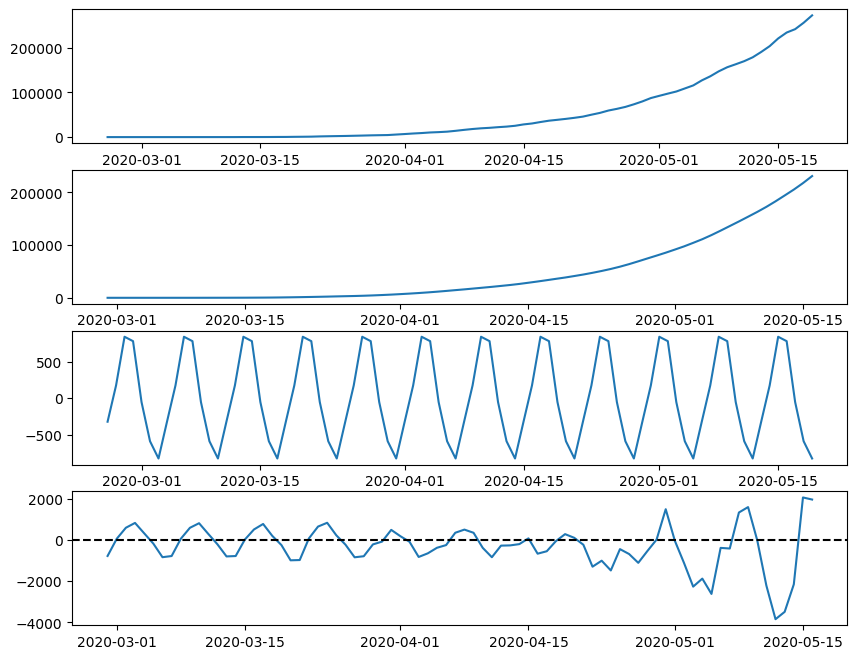

In [24]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,8))

ax1.plot(res.observed) #casos
ax2.plot(res.trend) #tendência
ax3.plot(res.seasonal) #sasonalidade
ax4.plot(confirmados.index, res.resid) #ruído
ax4.axhline(0, linestyle="dashed", color="black")
plt.show()

In [25]:
#ARIMA - média móvel integrada autoregressiva
from pmdarima.arima import auto_arima
modelo = auto_arima(confirmados)

In [26]:
fig = go.Figure(go.Scatter(
  x=confirmados.index, y=confirmados, name='Observados'
))
fig.add_trace(go.Scatter(
  x=confirmados.index, y=modelo.predict_in_sample(), name='Preditos'
))
fig.add_trace(go.Scatter(
  x=pd.date_range('2020-05-20', '2020-06-20'), y=modelo.predict(31), name='Forecast'
))
fig.update_layout(title="Previsão casos confirmados no brasil para os próximos 30 dias")
fig.show()

In [27]:
#Modelo de crescimento
from fbprophet import Prophet

/home/diego/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [28]:
#Processamentos
train = confirmados.reset_index()[:-5]
test = confirmados.reset_index()[-5:]

#Renomeando as colunas
train.rename(columns={'observationdate':'ds', 'confirmed': 'y'}, inplace=True)
test.rename(columns={'observationdate':'ds', 'confirmed': 'y'}, inplace=True)

#Definir modelo de crescimento
profeta = Prophet(growth='logistic', changepoints=['2020-03-21', '2020-03-30', '2020-04-25',
                                                   '2020-05-03', '2020-05-10'])

# pop = 211463256 #População total do Brasil
pop = 1000000

train['cap'] = pop

profeta.fit(train)

#Previsão para o futuro
future_dates = profeta.make_future_dataframe(periods=200)
future_dates['cap'] = pop
forecast = profeta.predict(future_dates)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/diego/.local/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/diego/.local/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/diego/.local/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




Initial log joint probability = -88.8874
Iteration  1. Log joint probability =    98.2064. Improved by 187.094.
Iteration  2. Log joint probability =    122.489. Improved by 24.2828.
Iteration  3. Log joint probability =    159.571. Improved by 37.0819.
Iteration  4. Log joint probability =    187.231. Improved by 27.6597.
Iteration  5. Log joint probability =    209.543. Improved by 22.312.
Iteration  6. Log joint probability =    209.699. Improved by 0.156111.
Iteration  7. Log joint probability =    268.905. Improved by 59.2064.
Iteration  8. Log joint probability =    269.966. Improved by 1.0606.
Iteration  9. Log joint probability =    270.864. Improved by 0.898154.
Iteration 10. Log joint probability =    271.286. Improved by 0.422397.
Iteration 11. Log joint probability =    279.878. Improved by 8.59212.
Iteration 12. Log joint probability =    284.632. Improved by 4.75339.
Iteration 13. Log joint probability =    294.253. Improved by 9.62136.
Iteration 14. Log joint probabilit

In [29]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=forecast.ds, y=forecast.yhat, name='Predição'))
# fig.add_trace(go.Scatter(x=test.index, y=test, name='Teste'))
fig.add_trace(go.Scatter(x=train.ds, y=train.y, name='Treino'))
fig.update_layout(title="Predições de casos confirmados no Brasil")
fig.show()
